# Import Libraries

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller,acf,pacf,grangercausalitytests
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

# Read the data

In [2]:
def parser(s):
    return datetime.strptime(s, '%d-%m-%Y')

In [3]:
#import the data file

data = pd.read_csv(r"C:\Users\User\Dropbox\Study\APPLY\HOME LLC\Assignment 2\FRESH\Home_Price.csv", parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
data=data.asfreq(pd.infer_freq(data.index))

In [5]:
data.columns

Index(['POPULATION', 'CPI', 'MORTGAGE RATE', 'MONTHLY INCOME',
       'NO. OF PERMITS', 'S&P PRICE INDEX'],
      dtype='object')

In [6]:
data.shape

(252, 6)

In [7]:
data.head()

,POPULATION,CPI,MORTGAGE RATE,MONTHLY INCOME,NO. OF PERMITS,S&P PRICE INDEX
DATE,,,,,,
2000-01-01,281083,181.1,9.15,4069.25,64,99.85
2000-02-01,281299,181.5,8.83,4069.25,70,100.55
2000-03-01,281531,182.0,8.46,4069.25,65,101.34
2000-04-01,281763,182.3,8.32,4069.25,61,102.13
2000-05-01,281996,182.7,7.96,4069.25,70,102.92


# Plotting the data

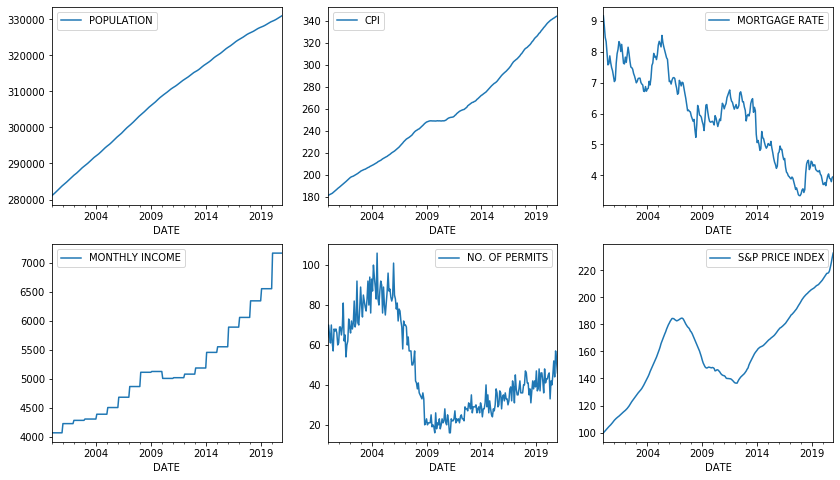

In [8]:
fig,ax = plt.subplots(2,3,figsize=(14,8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ts_1 = data['POPULATION']
ts_1.plot(ax=ax1, label = 'POPULATION')
ax1.legend(loc = 'best')

ts_2 = data['CPI']
ts_2.plot(ax = ax2, label = 'CPI')
ax2.legend(loc = 'best')

ts_3 = data['MORTGAGE RATE']
ts_3.plot(ax = ax3, label = 'MORTGAGE RATE')
ax3.legend(loc = 'best')

ts_4 = data['MONTHLY INCOME']
ts_4.plot(ax = ax4, label = 'MONTHLY INCOME')
ax4.legend(loc = 'best')

ts_5 = data['NO. OF PERMITS']
ts_5.plot(ax = ax5, label = 'NO. OF PERMITS')
ax5.legend(loc = 'best')

ts_6 = data['S&P PRICE INDEX']
ts_6.plot(ax = ax6, label = 'S&P PRICE INDEX')
ax6.legend(loc = 'best')

# Dickey–Fuller test

In [9]:
adf_test = adfuller(data['POPULATION'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -2.1989436899281483
p-value = 0.20662905984154017
series is not stationary


In [10]:
adf_test = adfuller(data['CPI'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 1.1217618233447806
p-value = 0.9953981376890156
series is not stationary


In [11]:
adf_test = adfuller(data['MORTGAGE RATE'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -0.9165428180864924
p-value = 0.7824758266326446
series is not stationary


In [12]:
adf_test = adfuller(data['MONTHLY INCOME'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 2.1747464604077087
p-value = 0.9988610752951655
series is not stationary


In [13]:
adf_test = adfuller(data['NO. OF PERMITS'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -0.9920252193422361
p-value = 0.7561617948842438
series is not stationary


In [14]:
adf_test = adfuller(data['S&P PRICE INDEX'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = 0.1117207668383284
p-value = 0.9668522742624491
series is not stationary


# Normalization

In [28]:
avgs = data.mean()
devs = data.std()

In [29]:
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / (devs.loc[col])

In [30]:
data = data.diff().dropna()

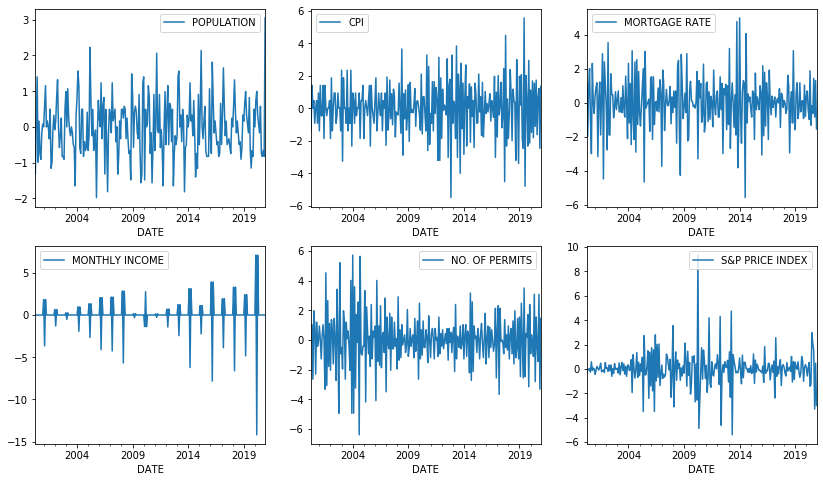

In [31]:
fig,ax = plt.subplots(2,3,figsize=(14,8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

ts_1 = data['POPULATION']
ts_1.plot(ax=ax1, label = 'POPULATION')
ax1.legend(loc = 'best')

ts_2 = data['CPI']
ts_2.plot(ax = ax2, label = 'CPI')
ax2.legend(loc = 'best')

ts_3 = data['MORTGAGE RATE']
ts_3.plot(ax = ax3, label = 'MORTGAGE RATE')
ax3.legend(loc = 'best')

ts_4 = data['MONTHLY INCOME']
ts_4.plot(ax = ax4, label = 'MONTHLY INCOME')
ax4.legend(loc = 'best')

ts_5 = data['NO. OF PERMITS']
ts_5.plot(ax = ax5, label = 'NO. OF PERMITS')
ax5.legend(loc = 'best')

ts_6 = data['S&P PRICE INDEX']
ts_6.plot(ax = ax6, label = 'S&P PRICE INDEX')
ax6.legend(loc = 'best')

In [32]:
adf_test = adfuller(data['POPULATION'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -11.655605570490405
p-value = 1.9889211562962208e-21
series is stationary


In [33]:
adf_test = adfuller(data['CPI'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -8.73187452655895
p-value = 3.175508089313625e-14
series is stationary


In [34]:
adf_test = adfuller(data['MORTGAGE RATE'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -8.189090898344325
p-value = 7.754930740777647e-13
series is stationary


In [35]:
adf_test = adfuller(data['MONTHLY INCOME'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -9.578018957545847
p-value = 2.1965595355756295e-16
series is stationary


In [36]:
adf_test = adfuller(data['NO. OF PERMITS'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -10.062924685848206
p-value = 1.3189603134368192e-17
series is stationary


In [37]:
adf_test = adfuller(data['S&P PRICE INDEX'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))


if adf_test[1]>0.05:
    print('series is not stationary')
else:
    print('series is stationary')

ADF = -11.98213685197295
p-value = 3.683753550094247e-22
series is stationary


All series are stationary now.

# Correlation Test

In [15]:
hcorr = data.corr()
hcorr.style.background_gradient()

,POPULATION,CPI,MORTGAGE RATE,MONTHLY INCOME,NO. OF PERMITS,S&P PRICE INDEX
POPULATION,1,0.981141,-0.92034,0.935762,-0.673399,0.775291
CPI,0.981141,1,-0.935192,0.982224,-0.580745,0.827491
MORTGAGE RATE,-0.92034,-0.935192,1,-0.917605,0.597089,-0.747238
MONTHLY INCOME,0.935762,0.982224,-0.917605,1,-0.518243,0.842017
NO. OF PERMITS,-0.673399,-0.580745,0.597089,-0.518243,1,-0.184465
S&P PRICE INDEX,0.775291,0.827491,-0.747238,0.842017,-0.184465,1


From here, if we consider the USA Home Price (S&P Price Index) and see how the other variables are impacting on these variables, it can be clearly interpreted that the Population, CPI, and Monthly Income are positively correlated with the USA Home Price and the Mortgage Rate and No. of Permits are negatively correlated with the USA Home Price.

But, it does not provide which variable is the cause and which one is the effect. And, also there is no information about the order of time. Thus, we go for granger causality test.

# Granger Causality Test

In [16]:
ts_df1 = pd.DataFrame(columns=['S&P PRICE INDEX', 'POPULATION'], data=zip(data['S&P PRICE INDEX'],data['POPULATION']))

In [17]:
gc_res1 = grangercausalitytests(ts_df1,6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4230  , p=0.5160  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.4281  , p=0.5129  , df=1
likelihood ratio test: chi2=0.4278  , p=0.5131  , df=1
parameter F test:         F=0.4230  , p=0.5160  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9781  , p=0.3775  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.9962  , p=0.3686  , df=2
likelihood ratio test: chi2=1.9883  , p=0.3700  , df=2
parameter F test:         F=0.9781  , p=0.3775  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9271  , p=0.4283  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=2.8617  , p=0.4134  , df=3
likelihood ratio test: chi2=2.8454  , p=0.4161  , df=3
parameter F test:         F=0.9271  , p=0.4283  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7591  , p=0.5528  

In [18]:
ts_df2 = pd.DataFrame(columns=['S&P PRICE INDEX', 'CPI'], data=zip(data['S&P PRICE INDEX'],data['CPI']))

In [19]:
gc_res2 = grangercausalitytests(ts_df2,7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3607  , p=0.5487  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.3650  , p=0.5457  , df=1
likelihood ratio test: chi2=0.3648  , p=0.5459  , df=1
parameter F test:         F=0.3607  , p=0.5487  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1270  , p=0.1214  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=4.3408  , p=0.1141  , df=2
likelihood ratio test: chi2=4.3035  , p=0.1163  , df=2
parameter F test:         F=2.1270  , p=0.1214  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4870  , p=0.2187  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=4.5901  , p=0.2044  , df=3
likelihood ratio test: chi2=4.5483  , p=0.2080  , df=3
parameter F test:         F=1.4870  , p=0.2187  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2058  , p=0.3090  

In [20]:
ts_df3 = pd.DataFrame(columns=['S&P PRICE INDEX', 'MORTGAGE RATE'], data=zip(data['S&P PRICE INDEX'],data['MORTGAGE RATE']))

In [21]:
gc_res3 = grangercausalitytests(ts_df3,1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9718  , p=0.0474  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=4.0198  , p=0.0450  , df=1
likelihood ratio test: chi2=3.9880  , p=0.0458  , df=1
parameter F test:         F=3.9718  , p=0.0474  , df_denom=248, df_num=1


In [22]:
ts_df4 = pd.DataFrame(columns=['S&P PRICE INDEX', 'MONTHLY INCOME'], data=zip(data['S&P PRICE INDEX'],data['MONTHLY INCOME']))

In [23]:
gc_res4 = grangercausalitytests(ts_df4,2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2954  , p=0.5873  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.2990  , p=0.5845  , df=1
likelihood ratio test: chi2=0.2988  , p=0.5846  , df=1
parameter F test:         F=0.2954  , p=0.5873  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4519  , p=0.0126  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=9.0855  , p=0.0106  , df=2
likelihood ratio test: chi2=8.9243  , p=0.0115  , df=2
parameter F test:         F=4.4519  , p=0.0126  , df_denom=245, df_num=2


In [24]:
ts_df5 = pd.DataFrame(columns=['S&P PRICE INDEX', 'NO. OF PERMITS'], data=zip(data['S&P PRICE INDEX'],data['NO. OF PERMITS']))

In [25]:
gc_res5 = grangercausalitytests(ts_df5,1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=56.2960 , p=0.0000  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=56.9770 , p=0.0000  , df=1
likelihood ratio test: chi2=51.3477 , p=0.0000  , df=1
parameter F test:         F=56.2960 , p=0.0000  , df_denom=248, df_num=1


# PACF - S&P PRICE INDEX

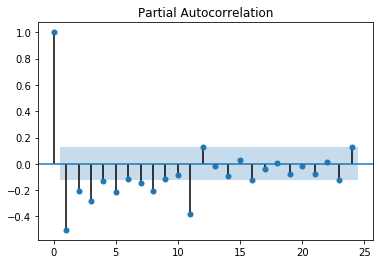

In [30]:
plot_pacf(data['S&P PRICE INDEX'])
plt.show()

# Model

In [31]:
model=VAR(data)
for i in range(48):
    results=model.fit(i+1)
    print('Order= ', i+1)
    print('AIC' ,results.aic)
    print('BIC' ,results.bic)

Order=  1
AIC -149.5777971686104
BIC -148.9827810099857
Order=  2
AIC -150.78796191106196
BIC -149.67973401528468
Order=  3
AIC -151.5885463433282
BIC -149.96412441204248
Order=  4
AIC -152.18558303269643
BIC -150.0419555568527
Order=  5
AIC -152.4520054503973
BIC -149.78613131144428
Order=  6
AIC -152.8269873648888
BIC -149.63579542899743
Order=  7
AIC -153.2857953062095
BIC -149.5661840113813
Order=  8
AIC -153.67987333230337
BIC -149.42871026821103
Order=  9
AIC -153.90456894710732
BIC -149.1186904275121
Order=  10
AIC -154.55518357788333
BIC -149.2313942054694
Order=  11
AIC -155.0426635454975
BIC -149.17773576896
Order=  12
AIC -155.02946730891338
BIC -148.62014097213202
Order=  13
AIC -155.0542529279629
BIC -148.0972348110894
Order=  14
AIC -155.0178275538389
BIC -147.5097909061218
Order=  15
AIC -155.06083422584976
BIC -146.9984182900151
Order=  16
AIC -155.0401554457325
BIC -146.41996497373577
Order=  17
AIC -155.0026928724892
BIC -145.82129763244706
Order=  18
AIC -154.9668300

In [32]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,-146.9,-146.8,1.587e-64,-146.9
1,-149.3,-148.6,1.475e-65,-149.0
2,-150.5,-149.2,4.499e-66,-149.9
3,-151.2,-149.3,2.159e-66,-150.4
4,-151.8,-149.4,1.160e-66,-150.8
5,-152.1,-149.0,9.222e-67,-150.8
6,-152.4,-148.8,6.491e-67,-151.0
7,-152.9,-148.7,3.966e-67,-151.2
8,-153.4,-148.5,2.611e-67,-151.4
9,-153.6,-148.2,2.152e-67,-151.4


In [33]:
model=VAR(data)
results=model.fit(47)

print(results.summary())

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Feb, 2021
Time:                     23:17:56
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -380.211
Nobs:                     202.000    HQIC:                  -396.769
Log likelihood:           41188.3    FPE:               1.44943e-180
AIC:                     -408.020    Det(Omega_mle):    7.56582e-183
--------------------------------------------------------------------
Results for equation POPULATION
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.000000              NAN              NAN             NAN
L1.POPULATION               0.000000         0.000254            0.000           1.000
L1.CPI                     -0.0